# 8.1 行业数据报表自动化

## 8.1.1 案例背景
#### 目标：筛选出2023年销售额总额TOP5的品牌以及对应的销售额
#### 现在各行业数据杂乱分布在100多张表中

In [20]:
import os
import pandas as pd
from common_util.openDataDir import getFullPath
import warnings

#忽略警告
warnings.filterwarnings('ignore')


## 8.1.2 单个表格处理

In [12]:
fileName = '垂钓装备&绑钩器.xlsx'
filePath = getFullPath('第8章 Python报表自动化/相关数据', fileName)
df = pd.read_excel(filePath)
df.head()

,日期,品牌,访客数,转化率,客单价,三级类目,详细类目
0,2023-12,品牌-17,343731,0.03,40,绑钩器,垂钓装备&绑钩器
1,2023-12,品牌-12,21850,0.02,286,绑钩器,垂钓装备&绑钩器
2,2023-12,品牌-20,117047,0.08,14,绑钩器,垂钓装备&绑钩器
3,2023-12,品牌-13,132785,0.02,50,绑钩器,垂钓装备&绑钩器
4,2023-12,品牌-1,37010,0.05,54,绑钩器,垂钓装备&绑钩器


#### 查看日期是否正确

In [13]:
# 得到列的去重结果，评估数据样本
df['日期'].unique()

array(['2023-12', '2023-11', '2023-10', '2023-09', '2023-08', '2023-07',
       '2023-06', '2023-05', '2023-04', '2023-03', '2023-02', '2023-01',
       '2022-12', '2022-11', '2022-10', '2022-09', '2022-08', '2022-07',
       '2022-06', '2022-05', '2022-04', '2022-03', '2022-02', '2022-01'],
      dtype=object)

#### 最终的目标是筛选出2023年相关的数据，因此需要做时间筛选

In [14]:
df_2023 = df.loc[df['日期'].str[:4] == '2023', :]
df_2023

,日期,品牌,访客数,转化率,客单价,三级类目,详细类目
0,2023-12,品牌-17,343731,0.03,40,绑钩器,垂钓装备&绑钩器
1,2023-12,品牌-12,21850,0.02,286,绑钩器,垂钓装备&绑钩器
2,2023-12,品牌-20,117047,0.08,14,绑钩器,垂钓装备&绑钩器
3,2023-12,品牌-13,132785,0.02,50,绑钩器,垂钓装备&绑钩器
4,2023-12,品牌-1,37010,0.05,54,绑钩器,垂钓装备&绑钩器
...,...,...,...,...,...,...,...
235,2023-01,品牌-18,16487,0.02,52,绑钩器,垂钓装备&绑钩器
236,2023-01,品牌-19,5542,0.06,52,绑钩器,垂钓装备&绑钩器
237,2023-01,品牌-12,4378,0.04,71,绑钩器,垂钓装备&绑钩器
238,2023-01,品牌-11,10898,0.02,56,绑钩器,垂钓装备&绑钩器


In [15]:
df_2023['销售额'] = df_2023['访客数'] * df_2023['转化率'] * df_2023['客单价']
df_2023.head()

,日期,品牌,访客数,转化率,客单价,三级类目,详细类目,销售额
0,2023-12,品牌-17,343731,0.03,40,绑钩器,垂钓装备&绑钩器,413657.34
1,2023-12,品牌-12,21850,0.02,286,绑钩器,垂钓装备&绑钩器,143076.32
2,2023-12,品牌-20,117047,0.08,14,绑钩器,垂钓装备&绑钩器,124956.34
3,2023-12,品牌-13,132785,0.02,50,绑钩器,垂钓装备&绑钩器,123114.73
4,2023-12,品牌-1,37010,0.05,54,绑钩器,垂钓装备&绑钩器,90947.94


#### 按品牌汇总，统计2023年对应行业销售额数据

In [16]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_sum = df_2023.groupby('品牌')['销售额'].sum().reset_index()
df_sum.head()


,品牌,销售额
0,品牌-1,1160411.73
1,品牌-10,476567.07
2,品牌-11,720308.05
3,品牌-12,1069478.32
4,品牌-13,955096.04


#### 在汇总数据上加一个行业标识

In [17]:
df_sum['行业'] = fileName.replace('.xlsx', '')
df_sum.head()

,品牌,销售额,行业
0,品牌-1,1160411.73,垂钓装备&绑钩器
1,品牌-10,476567.07,垂钓装备&绑钩器
2,品牌-11,720308.05,垂钓装备&绑钩器
3,品牌-12,1069478.32,垂钓装备&绑钩器
4,品牌-13,955096.04,垂钓装备&绑钩器


In [25]:
import itertools
from pathlib import Path

dirPath = Path(filePath).parent
list(itertools.islice(dirPath.rglob('*'), 5))

[PosixPath('/Users/ykdsg/Documents/个人/数据分析/《Python电商数据分析实战》随书数据源及代码/相关数据源/第8章 Python报表自动化/相关数据/户外服装&潜水服.xlsx'),
 PosixPath('/Users/ykdsg/Documents/个人/数据分析/《Python电商数据分析实战》随书数据源及代码/相关数据源/第8章 Python报表自动化/相关数据/户外照明&头灯.xlsx'),
 PosixPath('/Users/ykdsg/Documents/个人/数据分析/《Python电商数据分析实战》随书数据源及代码/相关数据源/第8章 Python报表自动化/相关数据/垂钓装备&钓鱼伞.xlsx'),
 PosixPath('/Users/ykdsg/Documents/个人/数据分析/《Python电商数据分析实战》随书数据源及代码/相关数据源/第8章 Python报表自动化/相关数据/专项户外运动装备&潜水袜.xlsx'),
 PosixPath('/Users/ykdsg/Documents/个人/数据分析/《Python电商数据分析实战》随书数据源及代码/相关数据源/第8章 Python报表自动化/相关数据/户外服装&户外休闲裤.xlsx')]

#### 批量循环

#### 主体用的都是上面单表处理的代码，只是加了循环，形成自动化

In [29]:
import time

start = time.time()

result = pd.DataFrame()
for filePath in list(dirPath.rglob('*')):
    df = pd.read_excel(filePath)
    df_2023 = df.loc[df['日期'].str[:4] == '2023', :]
    df_2023['销售额'] = df_2023['访客数'] * df_2023['转化率'] * df_2023['客单价']
    df_sum = df_2023.groupby('品牌')['销售额'].sum().reset_index()
    df_sum['类目'] = filePath.name.replace('.xlsx', '')
    result = pd.concat([result, df_sum])

#对最终结果按销售额进行排序
final = result.groupby('品牌')['销售额'].sum().reset_index().sort_values('销售额', ascending=False)

#结束时间
end = time.time()
print('用Python操作所花费时间：{} s'.format(end - start))
final.head()


用Python操作所花费时间：2.6796810626983643 s


,品牌,销售额
15,品牌-5,2814286376.98
8,品牌-17,2735897004.88
2,品牌-11,2617557159.86
4,品牌-13,2614862151.29
3,品牌-12,2590192538.85


# 8.2 批量处理与品牌投放分析

#### 目标：找到近一年（2023年）投放效果还不错的品牌，分析分析，年度表彰用
## 8.2.2 数据预览


In [30]:
fileName = '2023-12.xlsx'
filePath = getFullPath('第8章 Python报表自动化/投放数据', fileName)

In [31]:
data = pd.read_excel(filePath)
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   品牌      50 non-null     object
 1   品牌搜索人数  50 non-null     int64 
 2   点击人数    50 non-null     int64 
 3   支付人数    50 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.7+ KB
None


,品牌,品牌搜索人数,点击人数,支付人数
0,七喜,6896,3841,140
1,万迅,6394,3014,83
2,东方,16453,11114,1445
3,九方,53371,36682,942
4,佳禾,52686,28308,818


#### 循环批量汇总

In [32]:
result = pd.DataFrame()
dirPath = Path(filePath).parent
for filePath in list(dirPath.rglob('*')):
    df = pd.read_excel(filePath)
    df['日期'] = filePath.name[:4]
    result = pd.concat([result, df])

final = result.loc[result['日期'] == '2023', :]
print('数据行数：{}', len(final))
final.head()

数据行数：{} 600


,品牌,品牌搜索人数,点击人数,支付人数,日期
0,七喜,1228,518,41,2023
1,万迅,35027,17722,676,2023
2,东方,2061,1421,21,2023
3,九方,1811,846,31,2023
4,佳禾,11725,5808,710,2023


#### 品牌维度的汇总

In [33]:
gp = final.groupby('品牌')[['品牌搜索人数', '点击人数', '支付人数']].sum().reset_index().sort_values('品牌搜索人数',
                                                                                                     ascending=False)
gp.head()

,品牌,品牌搜索人数,点击人数,支付人数
12,双敏,1604198,571399,61244
3,九方,1552916,712139,101217
20,巨奥,1417267,512847,45790
15,商软,1002679,544392,72050
24,戴硕,920350,540284,30371


#### 计算对应的搜索-点击转化率、点击-支付转化率

In [34]:
gp['搜索-点击转化率'] = gp['点击人数'] / gp['品牌搜索人数']
gp['点击-支付转化率'] = gp['支付人数'] / gp['点击人数']
gp.head()

,品牌,品牌搜索人数,点击人数,支付人数,搜索-点击转化率,点击-支付转化率
12,双敏,1604198,571399,61244,0.36,0.11
3,九方,1552916,712139,101217,0.46,0.14
20,巨奥,1417267,512847,45790,0.36,0.09
15,商软,1002679,544392,72050,0.54,0.13
24,戴硕,920350,540284,30371,0.59,0.06


## 8.2.5 数据分析
#### 绘图呈现

Text(0.5, 1.0, 'TOP15品牌搜索分布')

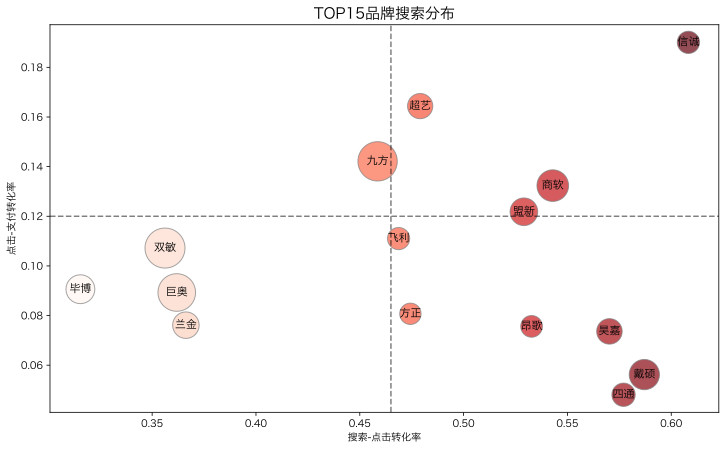

In [36]:
from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'svg'
%matplotlib inline
plt.rcParams['font.sans-serif'] = [
    'SimHei',  # Windows 黑体
    'Microsoft YaHei',  # Windows 雅黑
    'PingFang SC',  # macOS 苹方
    'Hiragino Sans GB',  # macOS 冬青黑体
    'Noto Sans CJK SC',  # Linux/通用（需安装）
    'Arial Unicode MS'  # 跨平台（需安装）
]

#筛选出TOP15的品牌
draw_data = gp.iloc[:15, :]
#设置画布大小
plt.figure(figsize=(12, 7))

#筛选对应的x，y值和标签名
x = draw_data['搜索-点击转化率'].to_list()
y = draw_data['点击-支付转化率'].to_list()
z = draw_data['品牌搜索人数']
text = draw_data['品牌'].tolist()

#绘制气泡图
plt.scatter(
    x,  # x轴数据
    y,  # y轴数据
    s=z / 1000,  # 点的大小（z值缩放1000倍）
    c=x,  # 颜色映射基于x值
    cmap="Reds",  # 红色系颜色映射
    alpha=0.7,  # 透明度70%
    edgecolors="grey",  # 点边缘为灰色
    linewidth=1  # 边缘线宽1像素
)

#为每个值打上对应品牌名
for i, txt in enumerate(text):
    plt.text(x=x[i], y=y[i], s=txt, size=11, horizontalalignment='center', verticalalignment='center')

# 添加黑色虚线水平辅助线
plt.axhline(y=0.12, color='black', linestyle='--', alpha=0.5)

# 添加黑色虚线垂直辅助线
plt.axvline(x=0.465, color='black', linestyle='--', alpha=0.5)

plt.xlabel("搜索-点击转化率")
plt.ylabel("点击-支付转化率")
plt.title("TOP15品牌搜索分布", size=15)